In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline

In [6]:
rng = np.random.RandomState(123)

## Probability Mass Functions

## Bernoulli Distribution

$X\sim \text{Bernoulli}(p)$ (where $0\leq p \leq 1$): one if a coin with heads probability $p$ comes up heads, zero otherwise.
\begin{equation}
p(x) = \begin{cases}p \quad &\text{if }x = 1\\
1-p & \text{if } x = 0
\end{cases}
\end{equation}

Note: $p(x)$ -- the function -- is the probability mass function for random variable $X$, while $p$ is the parameter for $X$ that defines the probability of getting heads.

In [5]:
coin_flips = rng.randint(0, 2, size=1000)  # Generates 1000 integers from the range [0,2)
heads = np.sum(coin_flips)
tails = coin_flips.shape[0] - heads
print(heads)
print(tails)

520
480


In [3]:
for i in range(7):
    num = 10**i  # Exponent operator: 10^i i.e. 1 flip, 10 flips, 100, 1000, etc.
    coin_flips = rng.randint(0, 2, size=num)
    heads_proba = np.mean(coin_flips)
    print('Heads probability for %d flips: %.2f' % (num, heads_proba*100))

Heads probability for 1 flips: 0.00
Heads probability for 10 flips: 40.00
Heads probability for 100 flips: 47.00
Heads probability for 1000 flips: 53.70
Heads probability for 10000 flips: 49.53
Heads probability for 100000 flips: 49.80
Heads probability for 1000000 flips: 50.03


Now if we do 100 coin flips 1000 times...

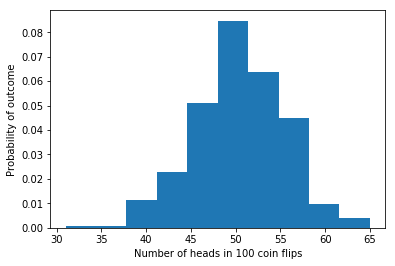

In [4]:
n_experiments = 1000
n_bernoulli_trials = 100

outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

plt.hist(outcomes, density=True)  # density=True option asks hist fucntion to display bins as a
                                  # probability density (scaled to sum to 1) instead of raw counts
# Also try: plt.hist(outcomes, 100, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

## Binomial Distribution

$X\sim \text{Binomial}(n, p)$ can be interpreted as the sum of *n* independent Bernoulli trials where *p* is the probability of success and $q = 1-p$ is the chance of failure.

The probability mass function for $X$ in this case is:

$$P(x) = \binom{n}{x} p^x q^{n-x}$$

where $\binom{n}{x}$ ("*n choose k*") is the binomial coefficient

$$\binom{n}{x} = \frac{n!}{x!(n-x)!}$$

### Exercise: Compute probability of 50 heads in 100 bernoulli trials flipping a fair coin:

In [3]:
from scipy.special import comb

p_50 = comb(100, 50)*(.5**50)*(.5**50)  # Compute P(50) for Binomial(100, .5)

In [4]:
n = 100
p = 0.5

bin_50 = stats.binom(n, p)
print(bin_50.pmf(50))
print(np.isclose(bin_50.pmf(50), p_50))

0.07958923738717888
True


The probability mass function has the following shape:

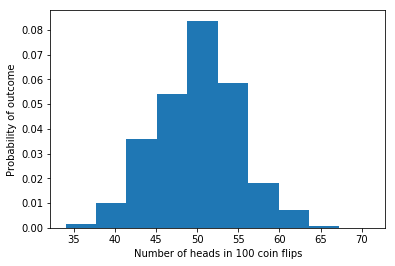

In [7]:
p = 0.5
n = 100
outcomes = rng.binomial(n, p, size=10000)

plt.hist(outcomes, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

## Poisson Distribution

- similar to binomial distribution but different:
    - binomial measures the number of successes based on discrete events (*k* successes in *n* trials)
    - poisson is based on "continuous events", but note that it is still a discrete probability distribution
    
- in poisson, we have $np \rightarrow \lambda$, in the limit of $n \rightarrow \infty$ and $p \rightarrow 0$
- $\mathcal{Bin}(n, p) \approx \mathcal{Poisson}(np), \text{ for } n \rightarrow  \infty$
- If $X\sim\text{Poisson}(\lambda)$

$$P(X = k) = e^{-\lambda} \frac{\lambda^k}{k!}$$

where $\lambda$ is the average number of events per interval

### Exercise: compute the probability of $P(X=5)$ when $X\sim \text{Poisson}(1)$

In [3]:
Lambda =1
k=5
poisson_prob_1 = math.e**(-Lambda) * Lambda**k / math.factorial(k)  # Compute me!
print(poisson_prob_1)

poisson_prob_2 = stats.poisson(mu=Lambda)
print(poisson_prob_2.pmf(k))

print(np.isclose(poisson_prob_1, poisson_prob_2.pmf(k))) # Note: fix here.

0.0030656620097620196
0.00306566200976202
True


Now check if the Poisson probability is close to the Binomial probability

In [4]:
n = 100
k = 5
p = 0.01

binomial_prob = stats.binom(n, p).pmf(k)
print(binomial_prob)
print(poisson_prob_1)
print(np.isclose(poisson_prob_1, binomial_prob))

0.0028977871237616114
0.0030656620097620196
False


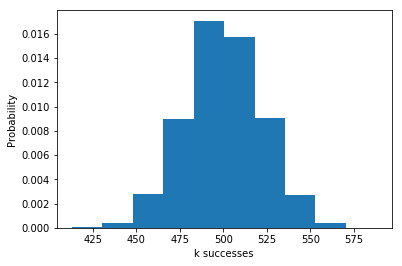

In [8]:
n = 10000
p = 0.05

binomial_samples = rng.binomial(n, p, 5000)
plt.hist(binomial_samples, density=True)
plt.ylabel('Probability')
plt.xlabel('k successes')
plt.show()

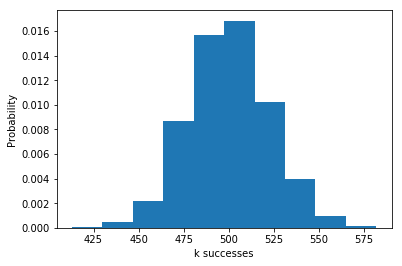

In [9]:
poisson_samples = rng.poisson(n*p, 5000)
plt.hist(poisson_samples, density=True)
plt.ylabel('Probability')
plt.xlabel('k successes')
plt.show()

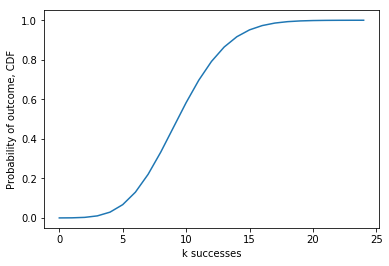

In [10]:
Lambda = 10
poisson_cdf = stats.poisson.cdf(np.arange(25), Lambda)

plt.plot(range(25), poisson_cdf)
plt.xlabel('k successes')
plt.ylabel('Probability of outcome, CDF')
plt.show()

## Probability Density Functions

## Gaussian Distribution

### Probability Density Function

- unimodal and symmetric
- many algorithms in machine learning & statistics have normality assumptions
- parameters: mean ($\mu$) and variance ($\sigma^2$); $N(\mu, \sigma^2)$
- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$


- standard normal distribution with zero mean and unit variance, $N(0, 1)$:

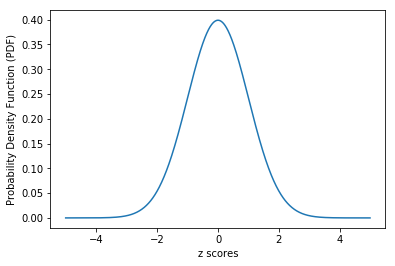

In [11]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2*variance)))

mean = 0
var = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, var)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

We can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$) using the 
following unbiased estimators
\begin{align}
\bar{X} &= \frac{1}{N}\sum_{i=1}^{N}x_{i}\\
S^2 &= \frac{1}{N-1}\sum_{i=1}^{N}(x_{i}-\bar{X})^2
\end{align}
### Exercise: implement the unbiased estimators for the Gaussian parameters using the sample given, compare with the original distribution

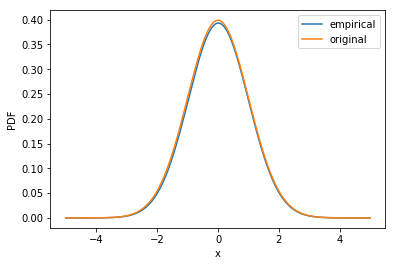

In [12]:
sample_size = 1000

sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

def parameter_estimation(sample):
    N = len(sample)
    sample_mean = (1.0/N)*sum(sample)
    sample_variance = 0.0
    for i in sample:
        sample_variance += (i-sample_mean)**2
    sample_variance = (1.0/(N-1))*sample_variance
    return sample_mean, sample_variance

sample_mean, sample_variance = parameter_estimation(sample)
x = np.arange(-5, 5, 0.01)
y_empirical = univariate_gaussian_pdf(x, sample_mean, sample_variance)
plt.plot(x, y_empirical, label='empirical')
plt.plot(x, y, label='original')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend()
plt.show()

### Cumulative Distribution Function (CDF)

- CDF of the normal distribution:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$


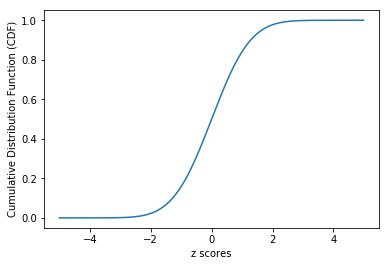

In [13]:
mean = 0
var = 1
x = np.arange(-5, 5, 0.01)

y_cdf = stats.norm.cdf(x, mean, var)
plt.plot(x, y_cdf)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

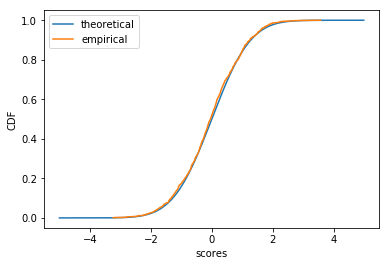

In [9]:
sample_size = 1000

sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

sample_mean, sample_variable = parameter_estimation(sample)
y_cdf_estimated = stats.norm.cdf(x, sample_mean, sample_variance)
plt.plot(x, y_cdf, label='original')
plt.plot(x, y_cdf_estimated, label='empirical')
plt.ylabel('CDF')
plt.xlabel('scores')
plt.legend()
plt.show()

## Exponential Distribution

### Probability Density Function of the Exponential Distribution

- has only 1 parameter, the rate parameter $\lambda$ (the "mean waiting time," $\lambda > 0$)
- describes the time between events in a Poisson process
- the exponential pdf is used to model waiting times between any two events from a poisson process; the exponential distribution is continuous

$$f(x; \lambda) = \begin{cases} 
      e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

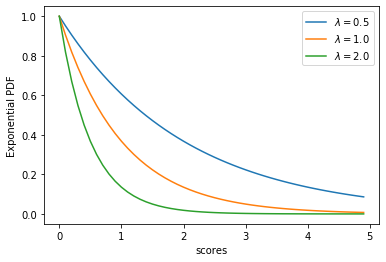

In [13]:
def univariate_exponential_pdf(x, lambda_):
    return np.where(x >= 0, np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_pdf(x, lambda_=.5)
y_1 = univariate_exponential_pdf(x, lambda_=1.)
y_2 = univariate_exponential_pdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential PDF')
plt.legend(loc = 'upper right')
plt.show()

Text(0, 0.5, 'Exponential PDF')

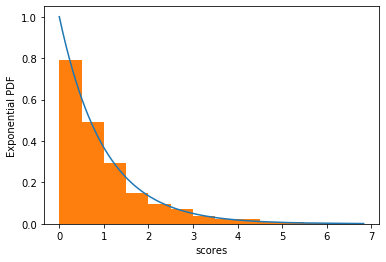

In [15]:
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.pdf(x_sample)

plt.plot(x_sample, y_sample)
plt.hist(x_sample, density=True, bins=np.arange(0, 7, 0.5))
plt.xlabel('scores')
plt.ylabel('Exponential PDF')

### Cumulative Distributiion Function of the Exponential Distribution

$$F(x; \lambda) = \begin{cases} 
      1 - e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

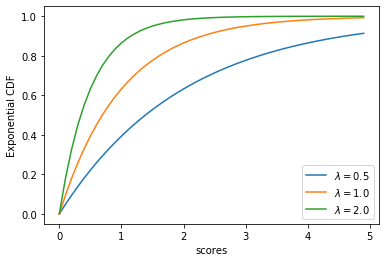

In [16]:
def univariate_exponential_cdf(x, lambda_):
    return np.where(x >= 0, 1 - np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_cdf(x, lambda_=.5)
y_1 = univariate_exponential_cdf(x, lambda_=1.)
y_2 = univariate_exponential_cdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.legend(loc = 'lower right')
plt.show()

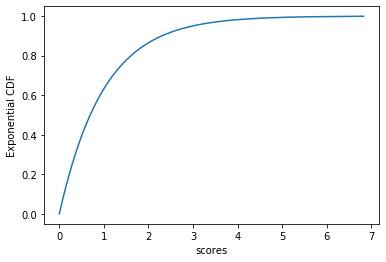

In [17]:
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.cdf(x_sample)

plt.plot(x_sample, y_sample)
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.show()